<a href="https://colab.research.google.com/github/hs0224/a-professor-student-research-club/blob/MinWooooooo/MinwooWorkspace/lmw_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 9.9 MB/s 
     |████████████████████████████████| 451 kB 49.7 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████| 5.8 MB 40.8 MB/s 
     |████████████████████████████████| 1.6 MB 20.6 MB/s 
     |████████████████████████████████| 212 kB 22.5 MB/s 
     |████████████████████████████████| 182 kB 40.7 MB/s 
     |████████████████████████████████| 132 kB 35.8 MB/s 
     |████████████████████████████████| 127 kB 4.0 MB/s 
     |████████████████████████████████| 7.6 MB 6.6 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [6]:
(path/'training').ls()

(#10) [Path('training/6'),Path('training/9'),Path('training/3'),Path('training/1'),Path('training/5'),Path('training/7'),Path('training/0'),Path('training/8'),Path('training/4'),Path('training/2')]

각 숫자 이미지별 정렬

In [7]:
zeros =(path/'training'/'0').ls().sorted() 
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixs = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
ones

(#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...]

각 숫자 이미지 텐서(비트별 숫자로 표기)

In [8]:
zero_tensors = [tensor(Image.open(o)) for o in zeros]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixs]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]


28x28이미지 쌓기

In [21]:
stacked_zeros = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixs = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_nines.shape

torch.Size([5949, 28, 28])

쌓은 이미지 평균이미지 내기

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.4748e-05, 1.6751e-04, 6.8858e-05, 0.0000e+00, 5.9588e-05,
         1.6287e-04, 7.7465e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9201e-05, 6.6209e-06, 0.0000e+00, 5.6278e-05, 1.3242e-04, 2.9132e-05, 0.0000e+00, 0.0000e+00, 6.0912e-05, 1.8671e-04, 3.1052e-04, 1.2977e-04, 1.1454e-04,
         1.5162e-04, 1.3242e-05, 5.0319e-05, 9.0044e-05, 0.0000e+00, 0.0000e+00, 0.0000e+

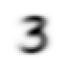

In [24]:
mean0 = stacked_zeros.mean(0)
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixs.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)
show_image(mean3);

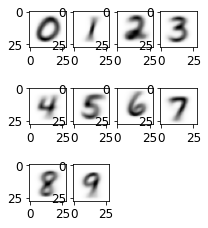

In [23]:
allmean = [mean0, mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9]
plt.figure(figsize=(3,4))

for i in range(0,10):
  plt.subplot(3, 4,i+1)
  plt.imshow(allmean[i])
plt.show()

In [12]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

NameError: ignored